# Aula04 - Pandas para Análise e Tratamento de Dados

**Conteúdo**
- Leitura de dados
- Filtros
- Agregações
- Agrupamentos
- Pivot Tables
- Estatísticas
- Séries Temporais

*O que faz um __cientista de dados__?*

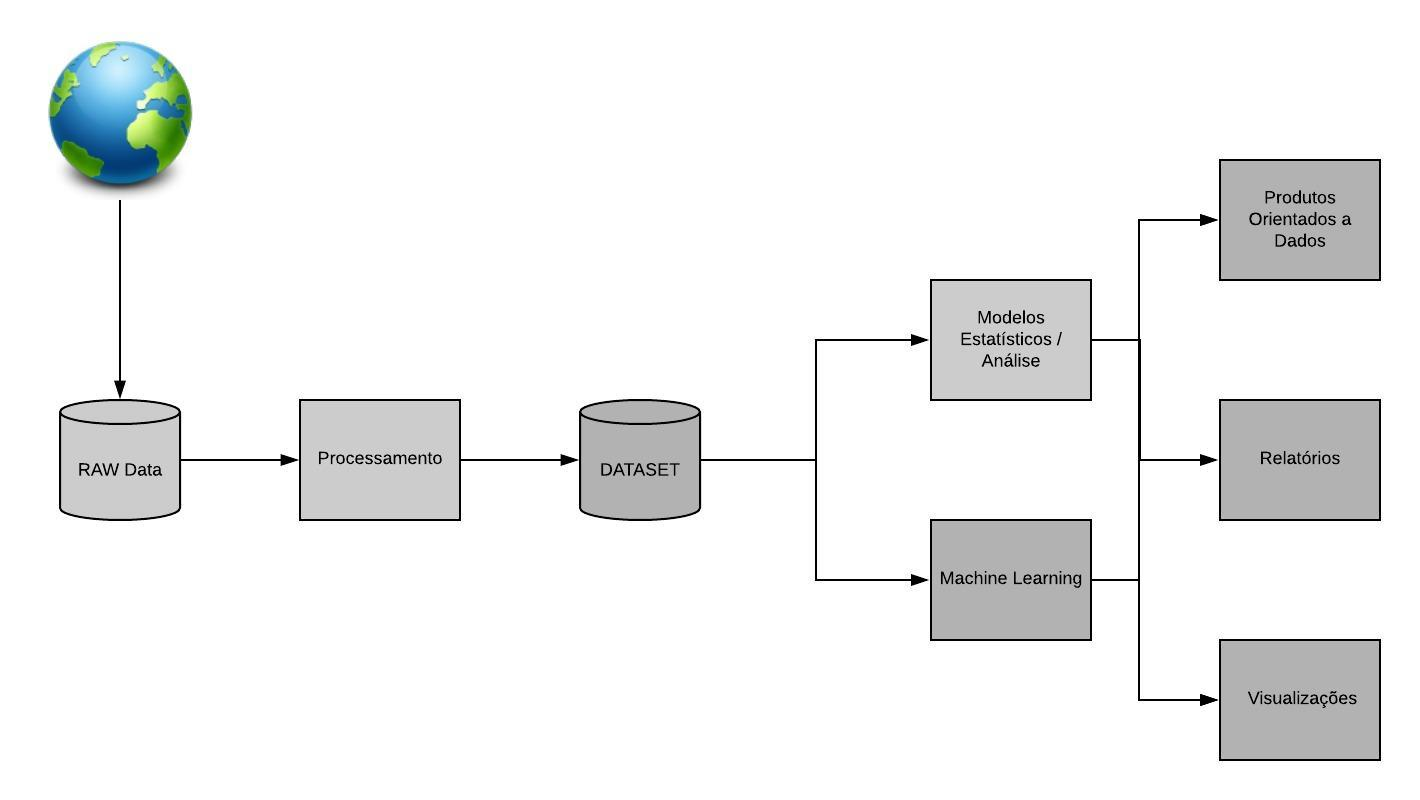

#### Pandas
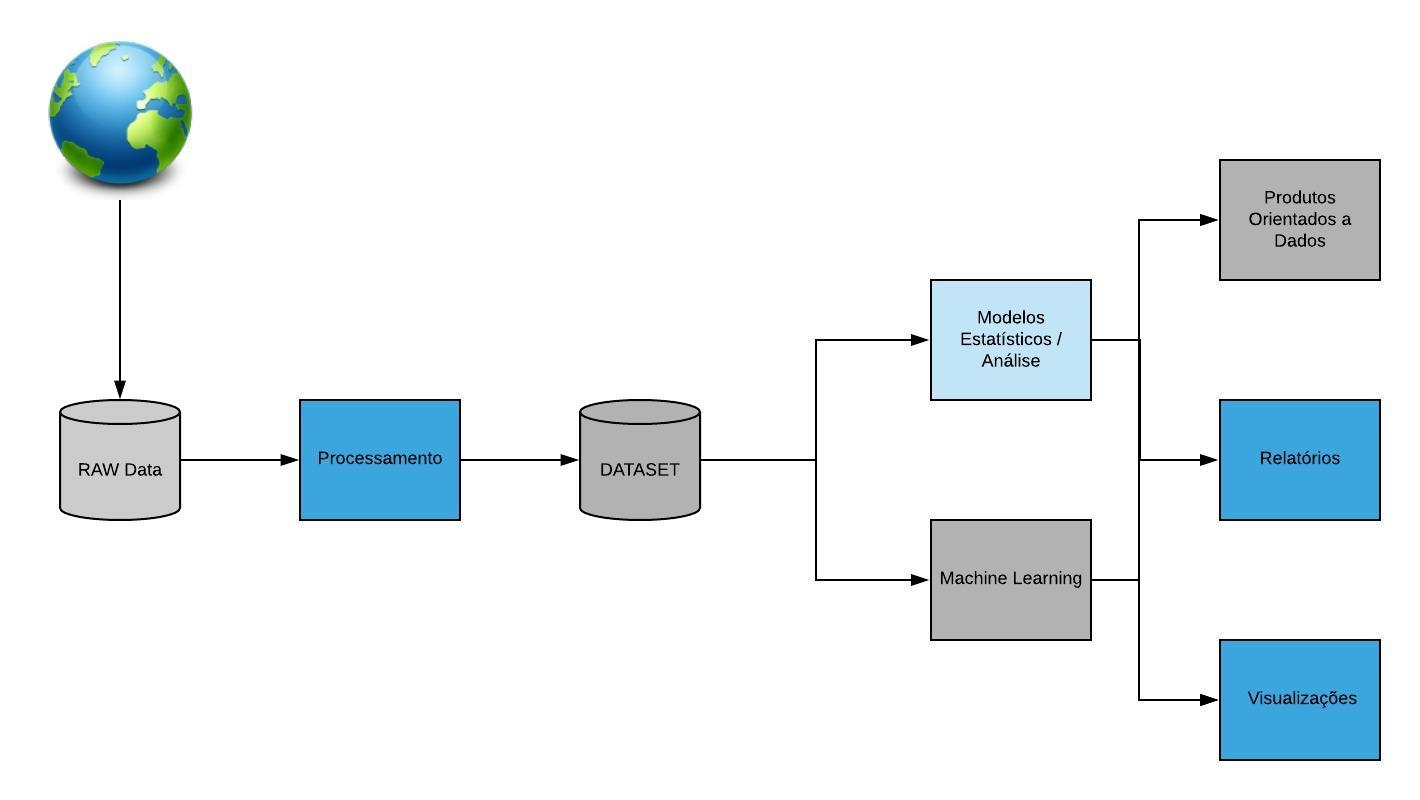

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#configuração para mostrar gráficos sem chamar a função show()
%matplotlib inline
#configuração para encontrar os datasets
path = '/content/drive/MyDrive/2022_2_extensao_adp/datasets/'

### PANDAS - Python Data Analysis Library


*Wes McKinney* começou a criar o Pandas em 2008 quando trabalhava em uma empresa de gestão de investimentos. Em sua obra *Python para Análise de Dados* o nome da biblioteca deriva do termo de econometria **Panel Data** (Dados em Painel, em portugês),  referente a conjuntos de dados multidimensionais estruturados.

Tipos de dados em econometria.

1.   cross-section
2.   séries temporais
3.   dados em painel







### O que é pandas?

Trata-se de uma biblioteca **Python** para **tratamento** e **análise de dados**. O Pandas possui dois objetos básicos: **Series** e **Dataframes**.

In [ ]:
import pandas as pd
pd.set_option('precision', 2)

### Objetos


#### Series
Series são *arrays* unidimensionais contendo dados associados a um índice.

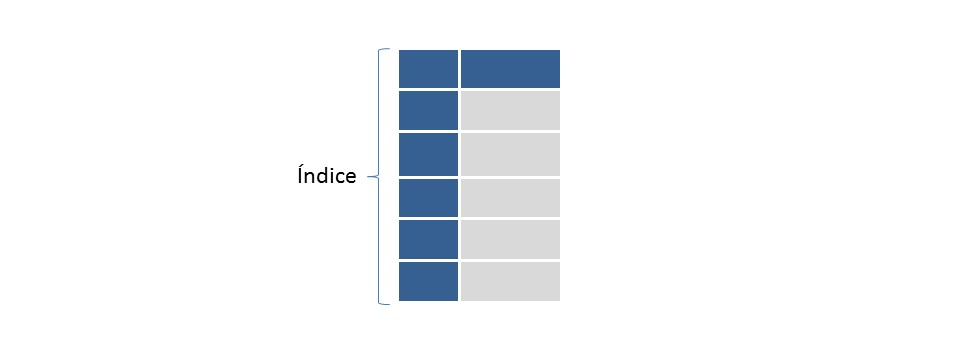

**Exemplo 01:** Representação do IPCA

INDICADOR | AGO/2021 | SET/2021 | OUT/2021 | NOV/2021 | DEZ/2021 | JAN/2022 | FEV/2022 | MAR/2022 | ABR/2022 | MAI/2022 | JUN/2022 | JUL/2022
---|---|---|---|---|---|---|---|---|---|---|---|---|
IPCA | 0,87% | 1,16% | 1,25% | 0,95% | 0,73% | 0,54% | 1,01% | 1,62% | 1,06% | 0,47% | 0,67% | -0,68% |


In [ ]:
# serie IPCA sem definição do índice
ipca = pd.Series([0.87, 1.16, 1.25, 0.95, 0.73, 0.54, 1.01, 1.62, 1.06, 0.47, 0.67, -0.68])
ipca

0     0.87
1     1.16
2     1.25
3     0.95
4     0.73
5     0.54
6     1.01
7     1.62
8     1.06
9     0.47
10    0.67
11   -0.68
dtype: float64

In [ ]:
# serie IPCA com definição do índice
ipca = pd.Series([0.87, 1.16, 1.25, 0.95, 0.73, 0.54, 1.01, 1.62, 1.06, 0.47, 0.67, -0.68], 
                 index=['ago', 'set', 'out', 'nov', 'dez', 'jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul'])
ipca

ago    0.87
set    1.16
out    1.25
nov    0.95
dez    0.73
jan    0.54
fev    1.01
mar    1.62
abr    1.06
mai    0.47
jun    0.67
jul   -0.68
dtype: float64

#### Dataframes
Dataframe é uma **estrutura tabular** contendo uma coleção ordenada de colunas. Cada coluna pode ter um tipo distinto de dado. Os Dataframes possuem índices tanto para colunas quanto para linhas e as operações são tratadas de forma simétrica nessas duas dimensões.

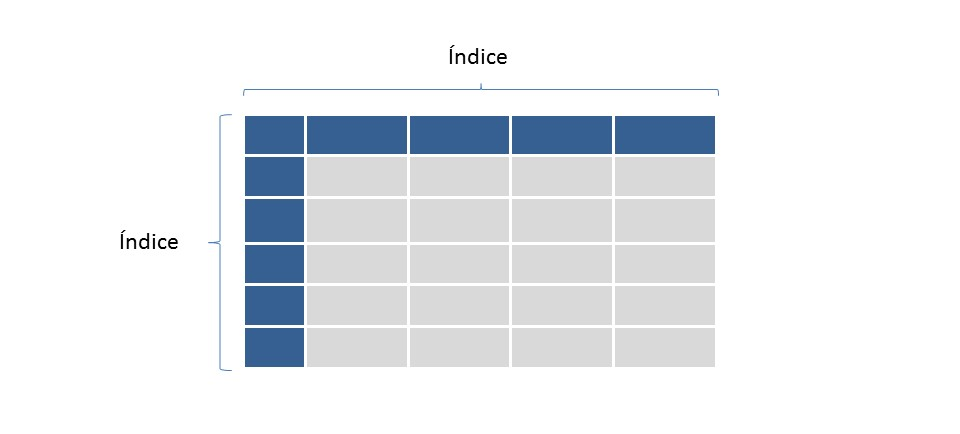

**Exemplo 02:** Representação de Indicadores Econômicos


INDICADOR | AGO/2021 | SET/2021 | OUT/2021 | NOV/2021 | DEZ/2021 | JAN/2022 | FEV/2022 | MAR/2022 | ABR/2022 | MAI/2022 | JUN/2022 | JUL/2022
---|---|---|---|---|---|---|---|---|---|---|---|---|
IPCA | 0,87% | 1,16% | 1,25% | 0,95% | 0,73% | 0,54% | 1,01% | 1,62% | 1,06% | 0,47% | 0,67% | -0,68% |
IGPM | 0,66% | -0,64% | 0,64% | 0,02% | 0,87% | 1,82% | 1,83% | 1,74% | 1,41% | 0,52% | 0,59% | 0,21% |
CDI | 0,43% | 0,44% | 0,49% | 0,59% | 0,77% | 0,73% | 0,76% | 0,93% | 0,83% | 1,03% | 1,02% | 1,03% |
IBOV | -2,48% | -6,57% | -6,74% | -1,5% | 2,85% | 6,98% | 0,89% | 6,06% | -10,10% | 3,22% | -11,50% | 4,69%


In [ ]:
# definicao dos dados em listas
referencias = ['ago', 'set', 'out', 'nov', 'dez', 'jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul']
cdi = [0.43, 0.44, 0.49, 0.59, 0.77, 0.73, 0.76, 0.93, 0.83, 1.03, 1.02, 1.03]
ipca = [0.87, 1.16, 1.25, 0.95, 0.73, 0.54, 1.01, 1.62, 1.06, 0.47, 0.67, -0.68]
igpm = [0.66, -0.64, 0.64, 0.02, 0.87, 1.82, 1.83, 1.74, 1.41, 0.52, 0.59, 0.21]

In [ ]:
# criação do dataframe e definição do índice
indicadores = pd.DataFrame(data={'IPCA': ipca, 'CDI': cdi, 'IGPM': igpm}, index=referencias)
indicadores

,IPCA,CDI,IGPM
ago,0.87,0.43,0.66
set,1.16,0.44,-0.64
out,1.25,0.49,0.64
nov,0.95,0.59,0.02
dez,0.73,0.77,0.87
jan,0.54,0.73,1.82
fev,1.01,0.76,1.83
mar,1.62,0.93,1.74
abr,1.06,0.83,1.41
mai,0.47,1.03,0.52


### Exercicio 01

Criar um dataframe contendo todos os dados da tabela e definir como indice a referência mensal do indicador

INDICADOR | AGO/2021 | SET/2021 | OUT/2021 | NOV/2021 | DEZ/2021 | JAN/2022 | FEV/2022 | MAR/2022 | ABR/2022 | MAI/2022 | JUN/2022 | JUL/2022
---|---|---|---|---|---|---|---|---|---|---|---|---|
IPCA | 0,87% | 1,16% | 1,25% | 0,95% | 0,73% | 0,54% | 1,01% | 1,62% | 1,06% | 0,47% | 0,67% | -0,68% |
IGPM | 0,66% | -0,64% | 0,64% | 0,02% | 0,87% | 1,82% | 1,83% | 1,74% | 1,41% | 0,52% | 0,59% | 0,21% |
CDI | 0,43% | 0,44% | 0,49% | 0,59% | 0,77% | 0,73% | 0,76% | 0,93% | 0,83% | 1,03% | 1,02% | 1,03% |
IBOV | -2,48% | -6,57% | -6,74% | -1,5% | 2,85% | 6,98% | 0,89% | 6,06% | -10,10% | 3,22% | -11,50% | 4,69%


In [ ]:
# Implementacao Ex01
referencias = ['ago', 'set', 'out', 'nov', 'dez', 'jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul']
cdi = [0.43, 0.44, 0.49, 0.59, 0.77, 0.73, 0.76, 0.93, 0.83, 1.03, 1.02, 1.03]
ipca = [0.87, 1.16, 1.25, 0.95, 0.73, 0.54, 1.01, 1.62, 1.06, 0.47, 0.67, -0.68]
igpm = [0.66, -0.64, 0.64, 0.02, 0.87, 1.82, 1.83, 1.74, 1.41, 0.52, 0.59, 0.21]
ibov = [ -2.48, -6.57, -6.74, -1.5, 2.85, 6.98, 0.89, 6.06, -10.10, 3.22, -11.50, 4.69]

In [ ]:
pd.DataFrame(data = {'IPCA':ipca, 'IGPM':igpm, 'CDI':cdi, 'IBOV':ibov}, index=referencias).T

,ago,set,out,nov,dez,jan,fev,mar,abr,mai,jun,jul
IPCA,0.87,1.16,1.25,0.95,0.73,0.54,1.01,1.62,1.06,0.47,0.67,-0.68
IGPM,0.66,-0.64,0.64,0.02,0.87,1.82,1.83,1.74,1.41,0.52,0.59,0.21
CDI,0.43,0.44,0.49,0.59,0.77,0.73,0.76,0.93,0.83,1.03,1.02,1.03
IBOV,-2.48,-6.57,-6.74,-1.50,2.85,6.98,0.89,6.06,-10.10,3.22,-11.50,4.69


In [ ]:
pd.DataFrame(dict(zip(referencias,zip(ipca, igpm, cdi, ibov))), index=['IPCA', 'IGPM', 'CDI', 'IBOV'])

,ago,set,out,nov,dez,jan,fev,mar,abr,mai,jun,jul
IPCA,0.87,1.16,1.25,0.95,0.73,0.54,1.01,1.62,1.06,0.47,0.67,-0.68
IGPM,0.66,-0.64,0.64,0.02,0.87,1.82,1.83,1.74,1.41,0.52,0.59,0.21
CDI,0.43,0.44,0.49,0.59,0.77,0.73,0.76,0.93,0.83,1.03,1.02,1.03
IBOV,-2.48,-6.57,-6.74,-1.50,2.85,6.98,0.89,6.06,-10.10,3.22,-11.50,4.69


### Indexação

Uma vez carregado o objeto Pandas, Serie ou Dataframe, podemos observar **subconjuntos** dos dados com linhas ou colunas específicas.  

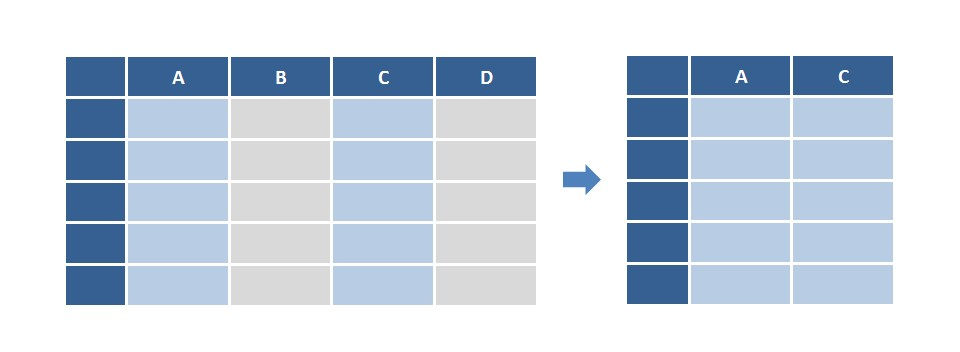

#### Índice Explicito

Recuperação de dados utilizando o índice explícito do Dataframe ou Serie

> *.loc[<seleção de linhas>, <seleção de colunas>]*

In [ ]:
indicadores

,IPCA,CDI,IGPM
ago,0.87,0.43,0.66
set,1.16,0.44,-0.64
out,1.25,0.49,0.64
nov,0.95,0.59,0.02
dez,0.73,0.77,0.87
jan,0.54,0.73,1.82
fev,1.01,0.76,1.83
mar,1.62,0.93,1.74
abr,1.06,0.83,1.41
mai,0.47,1.03,0.52


In [ ]:
# seleção de dados com índice "set"
indicadores.loc[['set']]

,IPCA,CDI,IGPM
set,1.16,0.44,-0.64


In [ ]:
# seleção de dados com índice "mai" na linha e "IPCA" na coluna
indicadores.loc[['mai'], ['IPCA']]

,IPCA
mai,0.47


In [ ]:
# seleção de dados com índices de "jan" até "jul" na linha "IPCA" na coluna
indicadores.loc['jan':'jul', ['IPCA']]

,IPCA
jan,0.54
fev,1.01
mar,1.62
abr,1.06
mai,0.47
jun,0.67
jul,-0.68


In [ ]:
# seleção de dados com índices de "fev" até o final na linha e colunas "IPCA" e "CDI" 
indicadores.loc['fev':, ['IPCA', 'CDI']]

,IPCA,CDI
fev,1.01,0.76
mar,1.62,0.93
abr,1.06,0.83
mai,0.47,1.03
jun,0.67,1.02
jul,-0.68,1.03


#### Índice Implícito

Recuperação de dados utilizando o índice implícito do Dataframe ou Serie

> *.iloc[<seleção de linhas>, <seleção de colunas>]*

In [ ]:
# seleção dos dados na posição 0 do dataframe
indicadores.iloc[[0]]

,IPCA,CDI,IGPM
ago,0.87,0.43,0.66


In [ ]:
# seleção dos dados no intervalo de linhas de 1 até 3 e colunas nas posições 0 e 2
indicadores.iloc[1:4, [0,2]]

,IPCA,IGPM
set,1.16,-0.64
out,1.25,0.64
nov,0.95,0.02


#### Apenas seleção de colunas

In [ ]:
# seleção de colunas simplificada sem utilizar .loc ou .iloc
indicadores[['IPCA', 'CDI']]

,IPCA,CDI
ago,0.87,0.43
set,1.16,0.44
out,1.25,0.49
nov,0.95,0.59
dez,0.73,0.77
jan,0.54,0.73
fev,1.01,0.76
mar,1.62,0.93
abr,1.06,0.83
mai,0.47,1.03


#### Exercicio 02.1

Selecionar o IGP-M dos meses de fevereiro, junho e setembro

In [ ]:
# Implementacao Ex02.1
indicadores.loc[['set', 'fev', 'jun'], ['IGPM']]

,IGPM
set,-0.64
fev,1.83
jun,0.59


#### Exercicio 02.2

Selecionar o IPCA e o CDI dos meses de março até julho

In [ ]:
# Implementação Ex02.2
# usando índice ímplicito
indicadores.iloc[7:11,[0, 1]]

,IPCA,CDI
mar,1.62,0.93
abr,1.06,0.83
mai,0.47,1.03
jun,0.67,1.02


In [ ]:
# usando índice explicito
indicadores.loc['mar':'jul',['IPCA', 'CDI']]

,IPCA,CDI
mar,1.62,0.93
abr,1.06,0.83
mai,0.47,1.03
jun,0.67,1.02
jul,-0.68,1.03


#### Exercicio 02.3
Selecionar o valor de todos indicadores da linha 3

In [ ]:
# Implementação Ex02.3
# no formato dataframe
indicadores.iloc[[3]]

,IPCA,CDI,IGPM
nov,0.95,0.59,0.02


In [ ]:
# no formato série
indicadores.iloc[3]

IPCA    0.95
CDI     0.59
IGPM    0.02
Name: nov, dtype: float64

### Filtros

A utilização de filtros permite a recuperação de dados que satisfazem uma **condição específica**

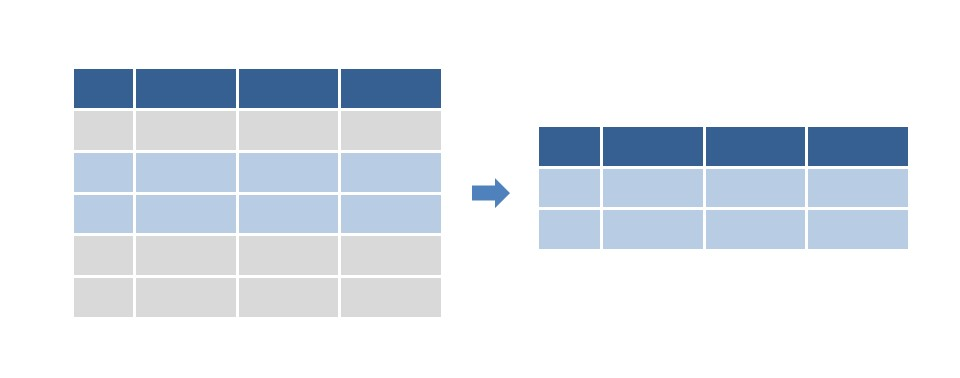

Pandas suporta os seguintes operadores básicos para filtro de dados

> **Matemáticos: >, <, >=, <=, ==, !=**

> **Lógicos: & (and), | (or), ~ (not)**

> **Conjuntos: isin(valores)**

\
*O resultado direto da aplicação do filtro é apresentado em um objeto Serie indicando quais índices satisfazem a operação**








In [ ]:
# relação do índice que satisfaz o critério de filtro
indicadores['IPCA'] < 0

ago    False
set    False
out    False
nov    False
dez    False
jan    False
fev    False
mar    False
abr    False
mai    False
jun    False
jul     True
Name: IPCA, dtype: bool

In [ ]:
# aplicação do filtro na recuperação dos dados
indicadores.loc[indicadores['IPCA'] < 0]
#em SQL, o equivalente a select * from indicadores where ipca < 0

,IPCA,CDI,IGPM
jul,-0.68,1.03,0.21


In [ ]:
# aplicação do filtro na recuperação dos dados
indicadores.loc[indicadores['IPCA'] < 0, ['IPCA']]
#em SQL, o equivalente a select ipca from indicadores where ipca < 0

,IPCA
jul,-0.68


In [ ]:
# aplicação do filtro na recuperação dos dados
indicadores[indicadores['IPCA'] >= 1.0]

,IPCA,CDI,IGPM
set,1.16,0.44,-0.64
out,1.25,0.49,0.64
fev,1.01,0.76,1.83
mar,1.62,0.93,1.74
abr,1.06,0.83,1.41


In [ ]:
# combinação de filtros, importante usar ()
indicadores[(indicadores['IPCA'] > 0.3) & (indicadores['CDI'] < 0.7)]

,IPCA,CDI,IGPM
ago,0.87,0.43,0.66
set,1.16,0.44,-0.64
out,1.25,0.49,0.64
nov,0.95,0.59,0.02


In [ ]:
# combinacao de filtros e seleção de colunas
indicadores.loc[(indicadores['IPCA'] > 0.3) & (indicadores['CDI'] < 0.7), ['IPCA', 'CDI']]

,IPCA,CDI
ago,0.87,0.43
set,1.16,0.44
out,1.25,0.49
nov,0.95,0.59


In [ ]:
# listagem de linhas que estejam no conjunto [0.01, 0.43, -0.04]
isin_filter = indicadores['IPCA'].isin([0.87, 1.16, 0.95])
isin_filter

ago     True
set     True
out    False
nov     True
dez    False
jan    False
fev    False
mar    False
abr    False
mai    False
jun    False
jul    False
Name: IPCA, dtype: bool

In [ ]:
# listagem dos dados que satisfazem o filtro
indicadores[isin_filter]

,IPCA,CDI,IGPM
ago,0.87,0.43,0.66
set,1.16,0.44,-0.64
nov,0.95,0.59,0.02


In [ ]:
indicadores

,IPCA,CDI,IGPM
ago,0.87,0.43,0.66
set,1.16,0.44,-0.64
out,1.25,0.49,0.64
nov,0.95,0.59,0.02
dez,0.73,0.77,0.87
jan,0.54,0.73,1.82
fev,1.01,0.76,1.83
mar,1.62,0.93,1.74
abr,1.06,0.83,1.41
mai,0.47,1.03,0.52


#### Exercicio 03.1

Apresentar todas as linhas nas quais um dos indicadores for menor que zero

In [ ]:
# Implementação Ex03.1
indicadores[(indicadores['IPCA'] < 0) | (indicadores['IGPM'] < 0) | (indicadores['CDI'] < 0)]

,IPCA,CDI,IGPM
set,1.16,0.44,-0.64
jul,-0.68,1.03,0.21


#### Exercicio 03.2

Filtrar todos os registros nos quais o IGP-M é maior que o IPCA

In [ ]:
# Implementação Ex03.2
indicadores[indicadores['IGPM'] > indicadores['IPCA']]

,IPCA,CDI,IGPM
dez,0.73,0.77,0.87
jan,0.54,0.73,1.82
fev,1.01,0.76,1.83
mar,1.62,0.93,1.74
abr,1.06,0.83,1.41
mai,0.47,1.03,0.52
jul,-0.68,1.03,0.21


#### Exercício 03.3

Apresentar todas os registros nos quais o IGPM é maior que o IPCA e o CDI

In [ ]:
# Implementação Ex03.3
indicadores[(indicadores['IGPM'] > indicadores['IPCA']) & (indicadores['IGPM'] > indicadores['CDI'])]

,IPCA,CDI,IGPM
dez,0.73,0.77,0.87
jan,0.54,0.73,1.82
fev,1.01,0.76,1.83
mar,1.62,0.93,1.74
abr,1.06,0.83,1.41


### Carga de Dados


Pandas é capaz de carregar arquivos nos formatos **.csv, .json, .xslx (excel)** ou conectar-se diretamente a base de dados.



> *pandas.read_csv(filepath_or_buffer, sep=',', delimiter=None, decimal=None, dtype=None, parse_dates=,...)*


> *pandas.read_excel(filepath_or_buffer, sheet_name=0, ...)*

> *pandas.read_sql(sql, con, index_col=None, coerce_float=True, params=None, columns=None)*



In [ ]:
# recuperacao de dados do banco central com arquivo em formato .csv
url_or_filepath = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.4447/dados/ultimos/60?formato=csv'
df_ipca = pd.read_csv(url_or_filepath)
df_ipca.tail(5)

,"data;""valor"""
"01/03/2022;""1","40"""
"01/04/2022;""1","42"""
"01/05/2022;""1","04"""
"01/06/2022;""0","50"""
"01/07/2022;""0","24"""


#### Primeiras opções para **explorar** os dados

\
Listar os tipos dos dados do dataset

> dtypes

Selecionar os primeiros *n* registros

> *head(n)*

Selecionar os últimos *n* registros

> *tail(n)*

Selecionar os *n* maiores registros de uma coluna

> *nlargest(n, column)*

Selecionar os *n* menores registros de uma coluna

> nsmallest(n, column)

Selecionar uma amostra dos dados

> *sample(n=number_of_itens, frac=fraction)*

\

In [ ]:
# Listagem dos tipos de dados inferidos na leitura do dataset
df_ipca.dtypes

data;"valor"    object
dtype: object

In [ ]:
# Leitura do dataset com especificação do separador de colunas e o separador decimal
df_ipca = pd.read_csv(url_or_filepath, sep=';', decimal=',', parse_dates=['data'])
df_ipca.head(5)

,data,valor
0,2017-01-08,-0.34
1,2017-01-09,0.00
2,2017-01-10,0.03
3,2017-01-11,-0.13
4,2017-01-12,0.49


In [ ]:
# Lisgatem dos tipos de dados inferidos após o ajuste na leitura do arquivo
df_ipca.dtypes

data     datetime64[ns]
valor           float64
dtype: object

In [ ]:
# Listagem dos 5 menores valores do dataset
df_ipca.nsmallest(5, 'valor')

,data,valor
15,2018-01-11,-0.61
0,2017-01-08,-0.34
29,2020-01-01,-0.28
32,2020-01-04,-0.25
6,2018-01-02,-0.20


#### Exercício 04.1

Carregar corretamente os dados do arquivo *bolsa_vale.csv*

In [ ]:
#aumenta o número de colunas a serem apresentadas
pd.set_option('display.max_columns', 20)
#aumenta o número de linhas a serem apresentadas
pd.set_option('display.max_rows', 20)

In [ ]:
# Implementação Ex03.1
df_vale = pd.read_csv(path+'01-DS_VALE3_Cotacao.csv', sep=';', decimal=',', parse_dates=['Date'])
df_vale.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-08-31,34.92,35.18,34.45,35.08,24.28,56429700
1,2017-01-09,35.50,35.98,35.26,35.67,24.68,22554600
2,2017-04-09,35.38,36.19,35.31,36.10,24.98,15002800
3,2017-05-09,36.50,36.69,35.18,35.60,24.64,24227100
4,2017-06-09,35.82,36.09,35.47,35.80,24.77,18117700


In [ ]:
df_vale.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

#### Exercício 04.2

Gerar uma amostra aleatória com 10 registros do arquivo *bolsa_vale.csv*


In [ ]:
# Implementação Ex03.2
df_vale.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume
1092,2022-01-25,84.06,85.05,83.05,84.06,76.96,22490500
546,2019-06-11,49.90,49.97,48.90,49.69,36.16,14879300
602,2020-01-31,50.96,51.06,49.80,50.27,37.55,29988200
516,2019-09-25,47.03,48.02,46.83,47.86,34.83,14554600
190,2018-01-06,50.90,53.08,50.65,52.76,37.32,20424100
1235,2022-08-19,67.00,67.44,66.48,66.96,66.96,45903800
589,2020-01-14,55.30,56.35,55.00,55.64,41.56,27817000
869,2021-04-03,99.40,101.49,97.52,98.86,76.94,48492500
461,2019-10-07,51.61,52.56,51.40,52.13,37.94,28106700
1077,2022-04-01,78.51,79.07,76.90,77.08,70.57,18178700


#### Exercício 04.3

Carregar corretamente os dados da aba 2 do arquivo *bec_abas.xlsx*


In [ ]:
# Implementação Ex03.3
bec_abas = pd.read_excel(path+'02-DS_BEC_abas.xlsx', sheet_name=1)
bec_abas

,Cód Desc Órgão,Mês Ano Encerramento,Valor Total Negociado em R$,Descrição Procedimento Compra,Código e Descrição Técnica do Grupo
0,01000 - ASSEMBLEIA LEGISLATIVA,2019-09-01,673.20,DISPENSA DE LICITAÇÃO,36 - MAQUINAS E EQUIPAMENTOS PARA INDUSTRIAS E...
1,01000 - ASSEMBLEIA LEGISLATIVA,2019-09-01,1880.00,DISPENSA DE LICITAÇÃO,71 - MOBILIARIOS EM GERAL
2,01000 - ASSEMBLEIA LEGISLATIVA,2019-09-01,340.00,DISPENSA DE LICITAÇÃO,"83 - TECIDOS, COUROS, PELES, AVIAMENTOS, BARRA..."
3,01000 - ASSEMBLEIA LEGISLATIVA,2019-09-01,1104.00,DISPENSA DE LICITAÇÃO,86 - INFORMATICA
4,01000 - ASSEMBLEIA LEGISLATIVA,2019-09-01,1090.00,DISPENSA DE LICITAÇÃO,89 - GENEROS ALIMENTICIOS
...,...,...,...,...,...
199086,51000 - SECRETARIA DE GOVERNO,2019-05-01,59.52,PREGÃO ELETRÔNICO,"79 - EQUIPAMENTOS E MATERIAIS PARA LIMPEZA, DE..."
199087,51000 - SECRETARIA DE GOVERNO,2019-05-01,329.00,PREGÃO ELETRÔNICO,89 - GENEROS ALIMENTICIOS
199088,51000 - SECRETARIA DE GOVERNO,2019-05-01,1692.00,PREGÃO ELETRÔNICO,89 - GENEROS ALIMENTICIOS
199089,51000 - SECRETARIA DE GOVERNO,2019-08-01,23500.00,PREGÃO ELETRÔNICO,02 - SERVICOS ESPECIALIZADOS


### Agregação/Sumarização

Uma parte essencial na análise de dados é a capacidade de sumarização de dados

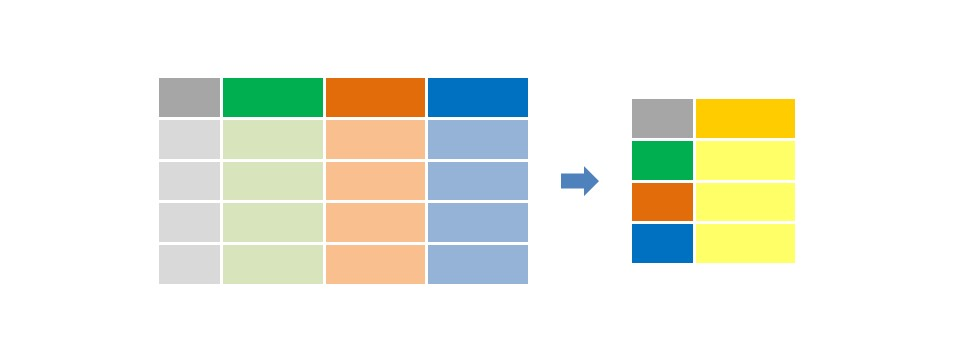

Pandas suporta nativamente os seguintes operadores de agregação:

| Agregação         | Descrição                            |
|-------------------|--------------------------------------|
| count()           | Número total de itens                |
| quantile()       | Calcula o quantil da amostragem variando de 0 a 1 |
| mean(),  median() | Média e Mediana                      |
| std(), var()	    | Desvio Padrão e Variância            |
| prod()	          | Produto de todos os itens            |
| sum()	            | Soma de todos os itens               |




In [ ]:
indicadores

,IPCA,CDI,IGPM
ago,0.87,0.43,0.66
set,1.16,0.44,-0.64
out,1.25,0.49,0.64
nov,0.95,0.59,0.02
dez,0.73,0.77,0.87
jan,0.54,0.73,1.82
fev,1.01,0.76,1.83
mar,1.62,0.93,1.74
abr,1.06,0.83,1.41
mai,0.47,1.03,0.52


In [ ]:
# IPCA Acumulado (soma)
indicadores['IPCA'].sum()

9.650000000000002

In [ ]:
# Média de todos os indicadores
indicadores.mean()

IPCA    0.80
CDI     0.75
IGPM    0.81
dtype: float64

In [ ]:
# Valor máximo de cada indicador
indicadores.max()

IPCA    1.62
CDI     1.03
IGPM    1.83
dtype: float64

In [ ]:
# Valor máximo dos indicadores no primeiro semestre
indicadores.loc['jan':'jul'].min()

IPCA   -0.68
CDI     0.73
IGPM    0.21
dtype: float64

In [ ]:
# descrição geral dos dados
indicadores.describe()

,IPCA,CDI,IGPM
count,12.00,12.00,12.00
mean,0.80,0.75,0.81
std,0.57,0.23,0.77
min,-0.68,0.43,-0.64
25%,0.64,0.56,0.44
50%,0.91,0.77,0.65
75%,1.08,0.95,1.49
max,1.62,1.03,1.83


#### Agregações complementares para análise de dados

> *.nunique()*: Quantifica elementos distintos de uma determinada dimensão

> *.value_counts()* : Quantifica e lista os elementos de uma determinada dimensão


Dataset BEC: https://www.ibec.fazenda.sp.gov.br/analytics/saw.dll?Portal

In [ ]:
# dados públicos da BEC para análise 
df_bec = pd.read_excel(path+'/03-DS_BEC.xlsx')
df_bec = df_bec[['Cód Desc Órgão', 'Mês Ano Encerramento', 'Cod Desc Fornecedor', 'Descrição Procedimento Compra', 'Cod Desc Item', 'Quantidade de Item','Valor Unitário Negociado', 'Valor Total Negociado em R$']]
# criando uma nova coluna
df_bec['Valor Negociado Mi'] = df_bec['Valor Total Negociado em R$'] / 1000000
df_bec.head(4)

,Cód Desc Órgão,Mês Ano Encerramento,Cod Desc Fornecedor,Descrição Procedimento Compra,Cod Desc Item,Quantidade de Item,Valor Unitário Negociado,Valor Total Negociado em R$,Valor Negociado Mi
0,01000 - ASSEMBLEIA LEGISLATIVA,2019-09-01,28363983000140 - OFICIAL WEB COMERCIAL LTDA - ME,DISPENSA DE LICITAÇÃO,"4843274 - FILME PROTETIVO, DE POLIESTER, 1,00X...",1,168.3,673.2,6.73e-04
1,01000 - ASSEMBLEIA LEGISLATIVA,2019-09-01,12517378000146 - A. C. DOS SANTOS MÓVEIS ME,DISPENSA DE LICITAÇÃO,"4863801 - ESTANTE DESMONTAVEL DE ACO,ABERTA,06...",1,235.0,1880.0,1.88e-03
2,01000 - ASSEMBLEIA LEGISLATIVA,2019-09-01,17365274000187 - CBF COMÉRCIO DE CONFECÇÕES BA...,DISPENSA DE LICITAÇÃO,"4628020 - BANDEIRA,MUNICIPIO DE SAO PAULO, MED...",1,170.0,340.0,3.40e-04
3,01000 - ASSEMBLEIA LEGISLATIVA,2019-09-01,23183671000130 - GALEQ COMÉRCIO INTERNACIONAL ...,DISPENSA DE LICITAÇÃO,"5133017 - NO-BREAK, 600 VA",1,27.6,1104.0,1.10e-03


In [ ]:
df_bec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199091 entries, 0 to 199090
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Cód Desc Órgão                 199091 non-null  object        
 1   Mês Ano Encerramento           199091 non-null  datetime64[ns]
 2   Cod Desc Fornecedor            199091 non-null  object        
 3   Descrição Procedimento Compra  199091 non-null  object        
 4   Cod Desc Item                  199091 non-null  object        
 5   Quantidade de Item             199091 non-null  int64         
 6   Valor Unitário Negociado       199091 non-null  float64       
 7   Valor Total Negociado em R$    199091 non-null  float64       
 8   Valor Negociado Mi             199091 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 13.7+ MB


In [ ]:
# contagem da quantidade de registros que cada órgão da administração é apresentado
df_bec['Cód Desc Órgão'].value_counts().iloc[0:5]

18000 - SECRETARIA DA SEGURANCA PUBLICA           59588
09000 - SECRETARIA DA SAUDE                       49346
38000 - SECRETARIA ADMINISTRACAO PENITENCIARIA    45853
10000 - SECR. DESENV. ECONOMICO                   18729
08000 - SECRETARIA DA EDUCACAO                     5190
Name: Cód Desc Órgão, dtype: int64

In [ ]:
# contagem de fornecedores únicos que participaram de licitações
df_bec['Cod Desc Fornecedor'].nunique()

5492

#### Exercício 05.1

Encontrar o valor médio unitário de aquisição do Item '4428692 - ACUCAR REFINADO'

In [ ]:
# Implementação Ex05.1 - Dica: Filtrar os registros com o item desejado
df_bec.loc[df_bec['Cod Desc Item'] == '4428692 - ACUCAR REFINADO', ['Valor Unitário Negociado']].mean()

Valor Unitário Negociado    1.93
dtype: float64

#### Exercício 05.2

Encontrar o valor unitário máximo de aquisição do item '4428692 - ACUCAR REFINADO'

In [ ]:
# Implementação Ex05.2 - Dica: Filtrar os registros com o item desejado
df_bec.loc[df_bec['Cod Desc Item'] == '4428692 - ACUCAR REFINADO', ['Valor Unitário Negociado']].max()

Valor Unitário Negociado    10.35
dtype: float64

### Agrupamento


Todas as funções de agregação/sumarização podem ser aplicadas para grupos de dados. No Pandas, o agrupamento é realizado pela função:

> *.groupby(by=None, axis=0, ...)*


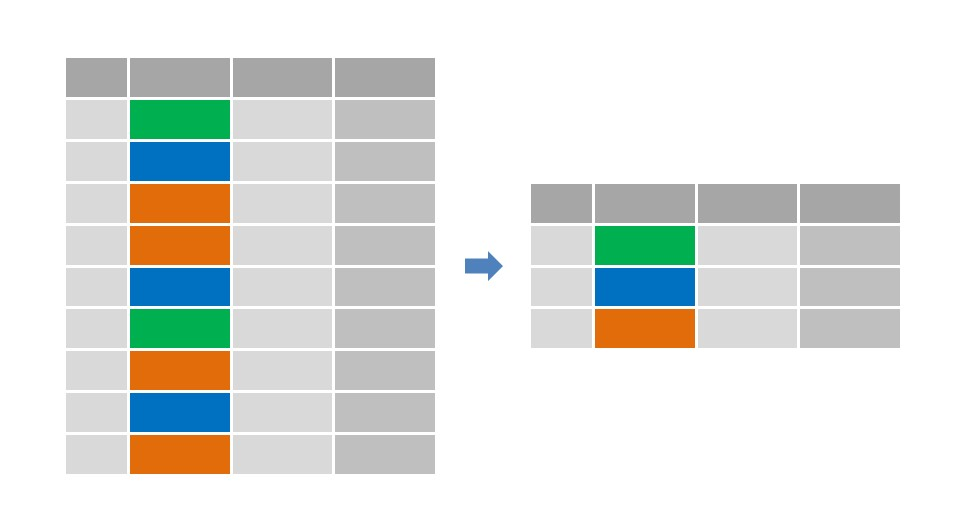

In [ ]:
df_bec.head(5)

,Cód Desc Órgão,Mês Ano Encerramento,Cod Desc Fornecedor,Descrição Procedimento Compra,Cod Desc Item,Quantidade de Item,Valor Unitário Negociado,Valor Total Negociado em R$,Valor Negociado Mi
0,01000 - ASSEMBLEIA LEGISLATIVA,2019-09-01,28363983000140 - OFICIAL WEB COMERCIAL LTDA - ME,DISPENSA DE LICITAÇÃO,"4843274 - FILME PROTETIVO, DE POLIESTER, 1,00X...",1,168.30,673.2,6.73e-04
1,01000 - ASSEMBLEIA LEGISLATIVA,2019-09-01,12517378000146 - A. C. DOS SANTOS MÓVEIS ME,DISPENSA DE LICITAÇÃO,"4863801 - ESTANTE DESMONTAVEL DE ACO,ABERTA,06...",1,235.00,1880.0,1.88e-03
2,01000 - ASSEMBLEIA LEGISLATIVA,2019-09-01,17365274000187 - CBF COMÉRCIO DE CONFECÇÕES BA...,DISPENSA DE LICITAÇÃO,"4628020 - BANDEIRA,MUNICIPIO DE SAO PAULO, MED...",1,170.00,340.0,3.40e-04
3,01000 - ASSEMBLEIA LEGISLATIVA,2019-09-01,23183671000130 - GALEQ COMÉRCIO INTERNACIONAL ...,DISPENSA DE LICITAÇÃO,"5133017 - NO-BREAK, 600 VA",1,27.60,1104.0,1.10e-03
4,01000 - ASSEMBLEIA LEGISLATIVA,2019-09-01,18702840000161 - SAO JERONIMO DISTRIBUIDORA DE...,DISPENSA DE LICITAÇÃO,"4518640 - ALIMENTO ACHOCOLATADO, PO FINO",1,5.45,1090.0,1.09e-03


In [ ]:
# cálculo do total negociado agrupado por órgão (listagem dos 5 primeiros itens) 
df_bec.groupby('Cód Desc Órgão')[['Valor Negociado Mi']].sum().iloc[0:5]  

,Valor Negociado Mi
Cód Desc Órgão,
01000 - ASSEMBLEIA LEGISLATIVA,43.60
02000 - TRIBUNAL DE CONTAS DO ESTADO,11.56
03000 - TRIBUNAL DE JUSTICA,312.19
06000 - TRIBUNAL DE JUSTICA MILITAR,0.42
08000 - SECRETARIA DA EDUCACAO,1519.96


Pandas também permite a ordenação do dataframe a partir de um conjunto de colunas de interesse

> *.sort_values(by=[colunas], ascending=True)*

In [ ]:
# listagem dos órgãoes e a soma do total negociado por licitação em ordem decrescente
df_gastos_sec = df_bec.groupby('Cód Desc Órgão')[['Valor Negociado Mi']].sum().sort_values(by='Valor Negociado Mi', ascending=False)
df_gastos_sec.iloc[0:6] #listagem de apenas 6 órgãos

,Valor Negociado Mi
Cód Desc Órgão,
09000 - SECRETARIA DA SAUDE,2922.09
08000 - SECRETARIA DA EDUCACAO,1519.96
37000 - SECRETARIA DOS TRANSPORTES METROPOLITANOS,1360.73
18000 - SECRETARIA DA SEGURANCA PUBLICA,1093.23
51000 - SECRETARIA DE GOVERNO,513.82
10000 - SECR. DESENV. ECONOMICO,448.88


In [ ]:
# a mesma coisa mas em 3 passos
df_gastos_sec = df_bec.groupby('Cód Desc Órgão')[['Valor Negociado Mi']].sum()
df_gastos_sec = df_gastos_sec.sort_values(by='Valor Negociado Mi', ascending=False)
df_gastos_sec.iloc[0:6] #listagem de apenas 6 órgãos
#df_gastos_sec

,Valor Negociado Mi
Cód Desc Órgão,
09000 - SECRETARIA DA SAUDE,2922.09
08000 - SECRETARIA DA EDUCACAO,1519.96
37000 - SECRETARIA DOS TRANSPORTES METROPOLITANOS,1360.73
18000 - SECRETARIA DA SEGURANCA PUBLICA,1093.23
51000 - SECRETARIA DE GOVERNO,513.82
10000 - SECR. DESENV. ECONOMICO,448.88


In [ ]:
# cálculo da quantidade total de itens negociada e o valor total negociado agrupada por órgão e procedimento de licitação
df_gastos = df_bec.groupby(['Cód Desc Órgão', 'Descrição Procedimento Compra'])['Quantidade de Item','Valor Negociado Mi'].sum()
df_gastos.sort_values(['Cód Desc Órgão','Descrição Procedimento Compra','Quantidade de Item'], ascending=True).iloc[0:6]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Quantidade de Item  \
Cód Desc Órgão                       Descrição Procedimento Compra                       
01000 - ASSEMBLEIA LEGISLATIVA       DISPENSA DE LICITAÇÃO                         161   
                                     PREGÃO ELETRÔNICO                              68   
02000 - TRIBUNAL DE CONTAS DO ESTADO PREGÃO ELETRÔNICO                              61   
03000 - TRIBUNAL DE JUSTICA          PREGÃO ELETRÔNICO                             560   
06000 - TRIBUNAL DE JUSTICA MILITAR  DISPENSA DE LICITAÇÃO                           1   
                                     PREGÃO ELETRÔNICO                              15   

                                                                    Valor Negociado Mi  
Cód Desc Órgão                       Descrição Procedimento Compra                      
01000 - ASSEMBLEIA LEGISLATIVA       DISPENSA DE LICITAÇÃO                    1.18e-01  
                                     PREGÃO ELETRÔNICO                        4.35e+01  
02000 - TRIBUNAL DE CONTAS DO ESTADO PREGÃO ELETRÔNICO                        1.16e+01  
03000 - TRIBUNAL DE JUSTICA          PREGÃO ELETRÔNICO                        3.12e+02  
06000 - TRIBUNAL DE JUSTICA MILITAR  DISPENSA DE LICITAÇÃO                    3.10e-03  
                                     PREGÃO ELETRÔNICO                        4.22e-01

Definição de múltiplas funções de agragação
> *agg(self, func, axis=0, *args, **kwargs*)

In [ ]:
# sumarização do total negociado e a quantidade de itens distintos e o valor total, 
df_bec.groupby(['Cód Desc Órgão', 
                'Descrição Procedimento Compra']).agg({'Cod Desc Item': 'nunique',
                                                       'Valor Negociado Mi': 'sum'}
                                                     ).iloc[0:6]

Cod Desc Item  \
Cód Desc Órgão                       Descrição Procedimento Compra                  
01000 - ASSEMBLEIA LEGISLATIVA       DISPENSA DE LICITAÇÃO                    137   
                                     PREGÃO ELETRÔNICO                         68   
02000 - TRIBUNAL DE CONTAS DO ESTADO PREGÃO ELETRÔNICO                         57   
03000 - TRIBUNAL DE JUSTICA          PREGÃO ELETRÔNICO                        277   
06000 - TRIBUNAL DE JUSTICA MILITAR  DISPENSA DE LICITAÇÃO                      1   
                                     PREGÃO ELETRÔNICO                         15   

                                                                    Valor Negociado Mi  
Cód Desc Órgão                       Descrição Procedimento Compra                      
01000 - ASSEMBLEIA LEGISLATIVA       DISPENSA DE LICITAÇÃO                    1.18e-01  
                                     PREGÃO ELETRÔNICO                        4.35e+01  
02000 - TRIBUNAL DE CONTAS DO ESTADO PREGÃO ELETRÔNICO                        1.16e+01  
03000 - TRIBUNAL DE JUSTICA          PREGÃO ELETRÔNICO                        3.12e+02  
06000 - TRIBUNAL DE JUSTICA MILITAR  DISPENSA DE LICITAÇÃO                    3.10e-03  
                                     PREGÃO ELETRÔNICO                        4.22e-01

In [ ]:
# multiplas agregacoes para uma mesma coluna
df_bec.groupby('Cod Desc Item')['Valor Unitário Negociado'].agg(['min', 'max', 'count','mean', 'std']).head(5)

,min,max,count,mean,std
Cod Desc Item,,,,,
"1000144 - AVENTAL CIRURGICO,BRIM,VERDE,C/MANGA LONGA,TAM.GG",47.70,47.70,1,47.70,NaN
"1000217 - ADAPTADOR INTERM.,PVC,C/CONECTOR,PINC,TUBO,02VIAS,20CM,ESTERIL",0.45,1.00,11,0.60,0.19
"1000241 - TUBO SILICONE,FLEXIVEL,INCOLOR,N.205",4.50,5.40,2,4.95,0.64
"1002473 - ESTICADOR DE USO GERAL ACO GALVANIZADO,CATRACA, MEDINDO ENTRE 4 E 8 CM",5.69,5.69,1,5.69,NaN
"1002929 - PAPEL MILIMETRADO P/ELETROCARDIOGRAFO,(216MMX316MM),P/DIXTAL EP-3",0.11,0.13,2,0.12,0.01


In [ ]:
# sumarização do total negociado e a quantidade de itens distintos e o valor total, 
df_bec.groupby(['Cód Desc Órgão', 
                'Descrição Procedimento Compra']).agg({'Cod Desc Item': 'nunique',
                                                       'Valor Negociado Mi': ['sum', 'max', 'min', 'median']}
                                                     ).iloc[0:6]

Cod Desc Item  \
                                                                         nunique   
Cód Desc Órgão                       Descrição Procedimento Compra                 
01000 - ASSEMBLEIA LEGISLATIVA       DISPENSA DE LICITAÇÃO                   137   
                                     PREGÃO ELETRÔNICO                        68   
02000 - TRIBUNAL DE CONTAS DO ESTADO PREGÃO ELETRÔNICO                        57   
03000 - TRIBUNAL DE JUSTICA          PREGÃO ELETRÔNICO                       277   
06000 - TRIBUNAL DE JUSTICA MILITAR  DISPENSA DE LICITAÇÃO                     1   
                                     PREGÃO ELETRÔNICO                        15   

                                                                   Valor Negociado Mi  \
                                                                                  sum   
Cód Desc Órgão                       Descrição Procedimento Compra                      
01000 - ASSEMBLEIA LEGISLATIVA       DISPENSA DE LICITAÇÃO                   1.18e-01   
                                     PREGÃO ELETRÔNICO                       4.35e+01   
02000 - TRIBUNAL DE CONTAS DO ESTADO PREGÃO ELETRÔNICO                       1.16e+01   
03000 - TRIBUNAL DE JUSTICA          PREGÃO ELETRÔNICO                       3.12e+02   
06000 - TRIBUNAL DE JUSTICA MILITAR  DISPENSA DE LICITAÇÃO                   3.10e-03   
                                     PREGÃO ELETRÔNICO                       4.22e-01   

                                                                              \
                                                                         max   
Cód Desc Órgão                       Descrição Procedimento Compra             
01000 - ASSEMBLEIA LEGISLATIVA       DISPENSA DE LICITAÇÃO          6.19e-03   
                                     PREGÃO ELETRÔNICO              1.39e+01   
02000 - TRIBUNAL DE CONTAS DO ESTADO PREGÃO ELETRÔNICO              4.32e+00   
03000 - TRIBUNAL DE JUSTICA          PREGÃO ELETRÔNICO              4.79e+01   
06000 - TRIBUNAL DE JUSTICA MILITAR  DISPENSA DE LICITAÇÃO          3.10e-03   
                                     PREGÃO ELETRÔNICO              2.44e-01   

                                                                              \
                                                                         min   
Cód Desc Órgão                       Descrição Procedimento Compra             
01000 - ASSEMBLEIA LEGISLATIVA       DISPENSA DE LICITAÇÃO          1.50e-06   
                                     PREGÃO ELETRÔNICO              7.97e-05   
02000 - TRIBUNAL DE CONTAS DO ESTADO PREGÃO ELETRÔNICO              2.60e-08   
03000 - TRIBUNAL DE JUSTICA          PREGÃO ELETRÔNICO              5.20e-05   
06000 - TRIBUNAL DE JUSTICA MILITAR  DISPENSA DE LICITAÇÃO          3.10e-03   
                                     PREGÃO ELETRÔNICO              3.00e-03   

                                                                              
                                                                      median  
Cód Desc Órgão                       Descrição Procedimento Compra            
01000 - ASSEMBLEIA LEGISLATIVA       DISPENSA DE LICITAÇÃO          3.09e-04  
                                     PREGÃO ELETRÔNICO              5.99e-03  
02000 - TRIBUNAL DE CONTAS DO ESTADO PREGÃO ELETRÔNICO              3.83e-02  
03000 - TRIBUNAL DE JUSTICA          PREGÃO ELETRÔNICO              2.41e-02  
06000 - TRIBUNAL DE JUSTICA MILITAR  DISPENSA DE LICITAÇÃO          3.10e-03  
                                     PREGÃO ELETRÔNICO              4.22e-03

In [ ]:
df_bec.head(1)

,Cód Desc Órgão,Mês Ano Encerramento,Cod Desc Fornecedor,Descrição Procedimento Compra,Cod Desc Item,Quantidade de Item,Valor Unitário Negociado,Valor Total Negociado em R$,Valor Negociado Mi
0,01000 - ASSEMBLEIA LEGISLATIVA,2019-09-01,28363983000140 - OFICIAL WEB COMERCIAL LTDA - ME,DISPENSA DE LICITAÇÃO,"4843274 - FILME PROTETIVO, DE POLIESTER, 1,00X...",1,168.3,673.2,6.73e-04


#### Exercício 06.1

Calcular o valor total negociado por fornecedor listando apenas os 5 maiores valores

In [ ]:
# Implementação Ex06.1
df_fornecedor = df_bec.groupby('Cod Desc Fornecedor')[['Valor Total Negociado em R$']].sum()
df_fornecedor = df_fornecedor.sort_values(by='Valor Total Negociado em R$', ascending=False)
df_fornecedor.iloc[0:5]

,Valor Total Negociado em R$
Cod Desc Fornecedor,
30306294000226 - BANCO BTG PACTUAL S.A,4.99e+08
33054826000192 - COMPANHIA EXCELSIOR DE SEGUROS,2.57e+08
33009945000204 - PRODUTOS ROCHE QUÍMICOS E FARMACÊUTICOS S.A.,2.44e+08
08070362000160 - NS ALIMENTOS LTDA,2.39e+08
17302664000108 - JAGUARA ALIMENTOS LTDA,2.24e+08


#### Exercício 06.2

Calcular a quantidade de fornecedores de cada órgão distribuídos nos tipos distintos de procedimentos de compra. Listar apenas 6 registros

In [ ]:
# Implementação Exercício 05.2
df_bec.groupby(['Cód Desc Órgão', 'Descrição Procedimento Compra'])[['Cod Desc Fornecedor']].nunique().iloc[0:6]

Cod Desc Fornecedor
Cód Desc Órgão                       Descrição Procedimento Compra                     
01000 - ASSEMBLEIA LEGISLATIVA       DISPENSA DE LICITAÇÃO                           54
                                     PREGÃO ELETRÔNICO                               41
02000 - TRIBUNAL DE CONTAS DO ESTADO PREGÃO ELETRÔNICO                               38
03000 - TRIBUNAL DE JUSTICA          PREGÃO ELETRÔNICO                              128
06000 - TRIBUNAL DE JUSTICA MILITAR  DISPENSA DE LICITAÇÃO                            1
                                     PREGÃO ELETRÔNICO                                6

### Pivot Table

Equivalente à função *pivot table* do excel. A função permite a sumarização de dados de colunas e linhas simultaneamente.

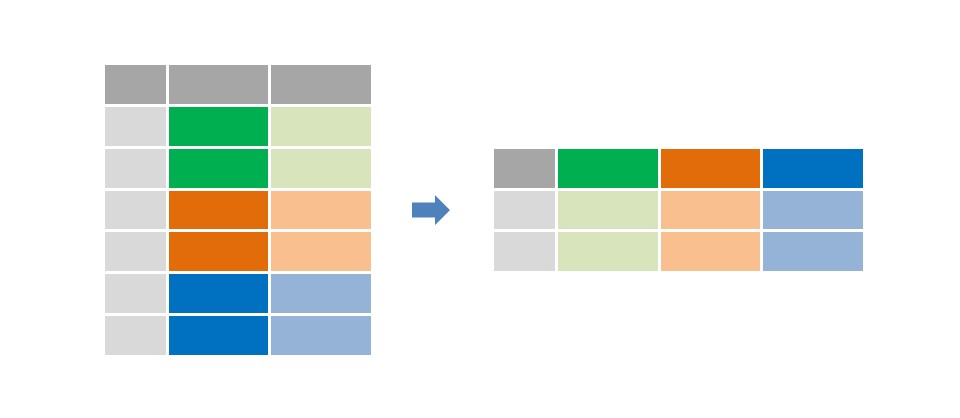

Pandas permite o redimensionamento dos dados através da função

> *pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)*

In [ ]:
# determinação do valor total negociado por tipo de procedimento de compra
df_bec.pivot_table(values=['Valor Negociado Mi'], columns='Descrição Procedimento Compra', aggfunc='sum')

Descrição Procedimento Compra,CONVITE,DISPENSA DE LICITAÇÃO,PREGÃO ELETRÔNICO
Valor Negociado Mi,121.75,18.28,9492.5


In [ ]:
# pivot com definição de mais de um valor de interesse
df_bec.pivot_table(values=['Valor Negociado Mi', 'Valor Unitário Negociado'], columns='Descrição Procedimento Compra', aggfunc='sum')

Descrição Procedimento Compra,CONVITE,DISPENSA DE LICITAÇÃO,PREGÃO ELETRÔNICO
Valor Negociado Mi,1.22e+02,1.83e+01,9.49e+03
Valor Unitário Negociado,9.98e+06,2.99e+06,1.85e+09


In [ ]:
#pivot table com multiplas funções de agregação
df_bec.pivot_table(values=['Valor Negociado Mi', 'Valor Unitário Negociado'], columns='Descrição Procedimento Compra', 
                   aggfunc={'Valor Negociado Mi': ['sum', 'max'],
                           'Valor Unitário Negociado': ['mean', 'min']})




Descrição Procedimento Compra   CONVITE  DISPENSA DE LICITAÇÃO  \
Valor Negociado Mi       max   1.89e-01               4.50e-02   
                         sum   1.22e+02               1.83e+01   
Valor Unitário Negociado mean  1.17e+02               1.51e+02   
                         min   2.50e-03               1.00e-04   

Descrição Procedimento Compra  PREGÃO ELETRÔNICO  
Valor Negociado Mi       max              428.88  
                         sum             9492.50  
Valor Unitário Negociado mean           19653.42  
                         min                0.00

In [ ]:
df_bec.head(2)

,Cód Desc Órgão,Mês Ano Encerramento,Cod Desc Fornecedor,Descrição Procedimento Compra,Cod Desc Item,Quantidade de Item,Valor Unitário Negociado,Valor Total Negociado em R$,Valor Negociado Mi
0,01000 - ASSEMBLEIA LEGISLATIVA,2019-09-01,28363983000140 - OFICIAL WEB COMERCIAL LTDA - ME,DISPENSA DE LICITAÇÃO,"4843274 - FILME PROTETIVO, DE POLIESTER, 1,00X...",1,168.3,673.2,6.73e-04
1,01000 - ASSEMBLEIA LEGISLATIVA,2019-09-01,12517378000146 - A. C. DOS SANTOS MÓVEIS ME,DISPENSA DE LICITAÇÃO,"4863801 - ESTANTE DESMONTAVEL DE ACO,ABERTA,06...",1,235.0,1880.0,1.88e-03


#### Exercício 07.1

Calcular o valor total negociado em cada encerramento de mês. O encerramento do mês deve ser apresentado como coluna. Utilizar o total negociado em milhões (Valor Negociado Mi).



In [ ]:
# Implementação Ex07.1
df_bec.pivot_table(values=['Valor Negociado Mi'], columns='Mês Ano Encerramento', aggfunc='sum')

Mês Ano Encerramento,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01
Valor Negociado Mi,663.36,792.87,632.31,725.17,1323.17,574.67,1916.32,1244.32,1043.93,716.4


## Series Temporais

Pandas foi desenvolvido em um contexto de análise financeira e possui uma lista extensiva de ferramentas para simplificar a manipulação de séries temporais.

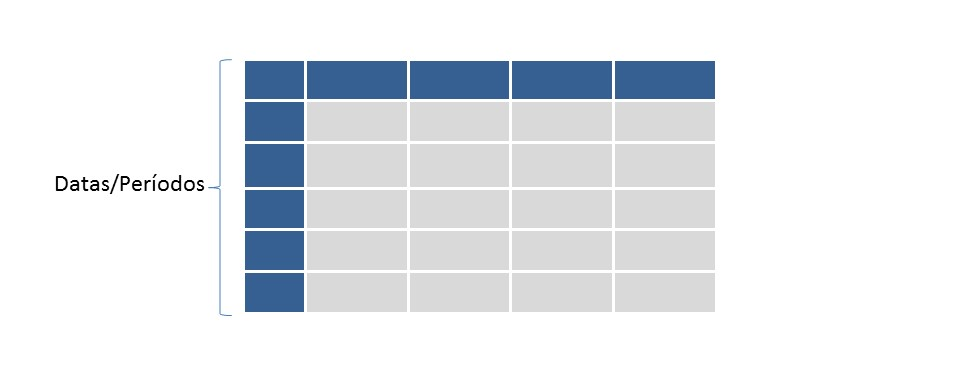


### Intervalos de Dados

Geração de intervalos de dados

> *pd.date_range(start, end, periods, freq)*

| Frequencia         | Descrição                            |
|-------------------|--------------------------------------|
| D           | Dias                |
| M   | Mês |
| Y | Ano                      |
| W	    | Semanas            |
| MS	            | Primeiro dia do mês              |



In [ ]:
# geração de intervalo de datas com 10 dias
pd.date_range('2019-01-01', freq='D', periods=10)

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# geração de intervalo de dadas com 9 anos
pd.date_range('2010-01-01', freq='Y', periods=9)

DatetimeIndex(['2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31', '2016-12-31', '2017-12-31',
               '2018-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

### Indexação pela dimensão temporal

In [ ]:
# atualizar o pacote data reader
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 4.1 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
# recuperação da cotação da VALE3
from pandas_datareader import data
df_vale3 = data.DataReader('VALE3.SA', start='2012', end='2022', data_source='yahoo')
df_vale3.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-23,80.059998,78.800003,79.949997,79.150002,13121200.0,72.463844
2021-12-27,79.449997,78.260002,78.870003,78.949997,11371400.0,72.280739
2021-12-28,78.529999,76.570000,78.510002,77.050003,18923700.0,70.541252
2021-12-29,77.980003,76.349998,76.379997,77.250000,12113500.0,70.724350
2021-12-30,78.980003,77.610001,77.989998,77.959999,26568500.0,71.374374


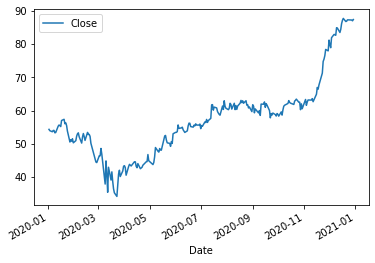

In [ ]:
# visualizacao simples da serie em 2020
df_vale3.loc['2020', ['Close']].plot()

In [ ]:
# cotação da VALE3 em 31/08/2021
df_vale3.loc['2021-08-31']

High         9.926000e+01
Low          9.770000e+01
Open         9.900000e+01
Close        9.868000e+01
Volume       2.043360e+07
Adj Close    8.184249e+01
Name: 2021-08-31 00:00:00, dtype: float64

In [ ]:
# cotação da VALE3 em agosto
df_vale3.loc['2021-08'].tail(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-08-25,100.459999,98.550003,100.089996,99.500000,15088600.0,82.522575
2021-08-26,99.800003,98.230003,99.489998,98.230003,18032300.0,81.469276
2021-08-27,101.000000,98.900002,99.010002,100.690002,19572800.0,83.509537
2021-08-30,101.639999,99.949997,100.820000,100.050003,13031600.0,82.978737
2021-08-31,99.260002,97.699997,99.000000,98.680000,20433600.0,81.842491


### Resample

Método para conversão de frequência temporal nas séries

.*resample(rule)*

In [ ]:
# mudança da frequencia temporal de dias para anos utilizando a média dos valores
df_vale3.resample('Y').mean().tail(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,31.750039,30.846496,31.299213,31.297008,1.077459e+07,21.462514
2018-12-31,50.595691,49.268089,49.947724,49.930772,1.760156e+07,35.704120
2019-12-31,49.763226,48.637742,49.252419,49.193065,2.072258e+07,35.808066
2020-12-31,58.053952,56.333307,57.206895,57.225080,3.024628e+07,43.337824
2021-12-31,96.901133,94.366923,95.726113,95.587004,2.734545e+07,79.678569


In [ ]:
# mudança da frequencia temporal para anos utilizando o último valor de cada período
df_vale3.resample('Y').last().tail(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,40.259998,40.259998,40.259998,40.259998,0.0,28.158089
2018-12-31,51.200001,50.250000,50.310001,51.000000,11914300.0,37.114735
2019-12-31,53.860001,53.200001,53.650002,53.299999,11928100.0,39.816364
2020-12-31,87.589996,86.650002,87.190002,87.449997,30102700.0,68.058067
2021-12-31,78.980003,77.610001,77.989998,77.959999,26568500.0,71.374374


### Shift

Deslocamento da série em uma quantidade de períodos determinada

> *.shift(periods=,fill_value=None)*


In [ ]:
# listagem dos valores de fechamento para comparação
df_vale3['Close'].head(5)

Date
2012-01-02    40.900002
2012-01-03    42.720001
2012-01-04    43.009998
2012-01-05    41.860001
2012-01-06    41.500000
Name: Close, dtype: float64

In [ ]:
# deslocamento do valor de fechamento em um período
s_close = df_vale3['Close'].shift(1, fill_value=0)
s_close.head(5)

Date
2012-01-02     0.000000
2012-01-03    40.900002
2012-01-04    42.720001
2012-01-05    43.009998
2012-01-06    41.860001
Name: Close, dtype: float64

### Window


In [ ]:
# cálculo da média móvel dos valores de fechamento 
media_movel = df_vale3['Close'].rolling(7).mean()
media_movel.tail(5)

Date
2021-12-23    79.244286
2021-12-27    79.464285
2021-12-28    78.979999
2021-12-29    78.705714
2021-12-30    78.659999
Name: Close, dtype: float64

In [ ]:
# armazenamento da média móvel no dataframe
df_vale3['MA'] = media_movel
df_vale3.tail(10)

,High,Low,Open,Close,Volume,Adj Close,MA
Date,,,,,,,
2021-12-16,80.459999,78.459999,79.000000,80.440002,30125700.0,73.644882,77.164287
2021-12-17,80.669998,79.070000,79.900002,79.169998,38744500.0,72.482155,77.651429
2021-12-20,78.900002,77.279999,78.000000,78.279999,19195400.0,71.667336,78.094286
2021-12-21,80.389999,79.150002,79.800003,80.339996,19590300.0,73.553322,78.764285
2021-12-22,80.150002,78.580002,79.889999,79.919998,18655600.0,73.168800,79.058571
2021-12-23,80.059998,78.800003,79.949997,79.150002,13121200.0,72.463844,79.244286
2021-12-27,79.449997,78.260002,78.870003,78.949997,11371400.0,72.280739,79.464285
2021-12-28,78.529999,76.570000,78.510002,77.050003,18923700.0,70.541252,78.979999
2021-12-29,77.980003,76.349998,76.379997,77.250000,12113500.0,70.724350,78.705714


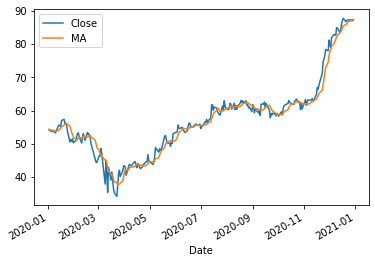

In [ ]:
df_vale3.loc['2020', ['Close','MA']].plot()

#### Exercício 08.1

Criar uma coluna com o valor da média móvel de 10 períodos da VALE3 baseado no valor de fechamento.

In [ ]:
# Implementação
# cálculo da média móvel dos valores de fechamento 
media_movel10 = df_vale3['Close'].rolling(10).mean()
df_vale3['MA10']=media_movel10

In [ ]:
df_vale3.head(15)

,High,Low,Open,Close,Volume,Adj Close,MA,MA10
Date,,,,,,,,
2012-01-02,40.959999,39.770000,39.770000,40.900002,2108100.0,22.218412,NaN,NaN
2012-01-03,42.910000,41.150002,41.150002,42.720001,5811100.0,23.207106,NaN,NaN
2012-01-04,43.139999,42.020000,42.189999,43.009998,2511600.0,23.364643,NaN,NaN
2012-01-05,42.759998,41.630001,42.509998,41.860001,2954200.0,22.739920,NaN,NaN
2012-01-06,42.299999,41.090000,42.299999,41.500000,2336500.0,22.544359,NaN,NaN
2012-01-09,41.799999,41.049999,41.799999,41.450001,1966600.0,22.517191,NaN,NaN
2012-01-10,42.349998,41.400002,42.279999,41.400002,3148800.0,22.490038,41.834286,NaN
2012-01-11,41.860001,41.029999,41.400002,41.709999,3035800.0,22.658432,41.950000,NaN
2012-01-12,42.200001,40.950001,42.160000,41.290001,5649100.0,22.430275,41.745714,NaN


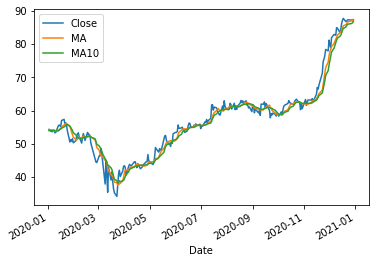

In [ ]:
df_vale3.loc['2020', ['Close','MA', 'MA10']].plot()